<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.4_probability_theory/stats_probtheory_sampleVariability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Probability theory
# Sampling variability

In [15]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

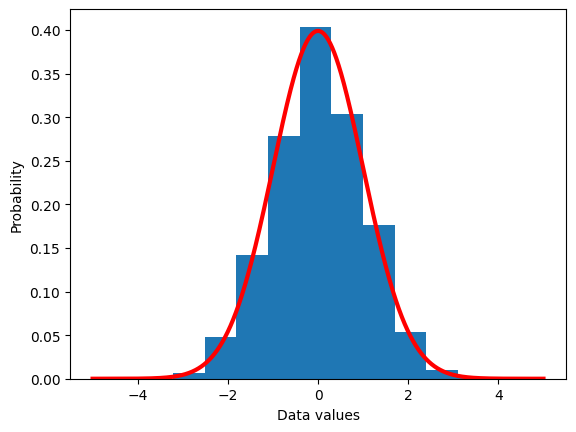

In [12]:
## a theoretical normal distribution
x = np.linspace(-5,5,10101)
theoNormDist = stats.norm.pdf(x) # or Gaussian distribution
# (normalize to pdf)
# theoNormDist = theoNormDist*np.mean(np.diff(x))

# now for our experiment
numSamples = 4000

# initialize
sampledata = np.zeros(numSamples)

# run the experiment!
for expi in range(numSamples):
    sampledata[expi] = np.random.randn()


# show the results
plt.hist(sampledata,density=True)
plt.plot(x,theoNormDist,'r',linewidth=3)
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.show()

In [13]:
## show the mean of samples of a known distribution

# generate population data with known mean
populationN = 1000000
population  = np.random.randn(populationN)
population  = population - np.mean(population) # demean


# now we draw a random sample from that population
samplesize = 30

# the random indices to select from the population
sampleidx = np.random.randint(0,populationN,samplesize)
samplemean = np.mean(population[ sampleidx ])

### how does the sample mean compare to the population mean?
print(samplemean)

0.04223774620780555


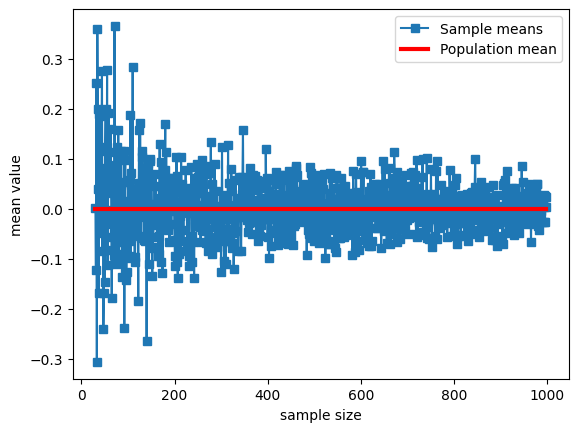

In [4]:
## repeat for different sample sizes

samplesizes = np.arange(30,1000)

samplemeans = np.zeros(len(samplesizes))

for sampi in range(len(samplesizes)):

    # nearly the same code as above
    sampleidx = np.random.randint(0,populationN,samplesizes[sampi])
    samplemeans[sampi] = np.mean(population[ sampleidx ])


# show the results!
plt.plot(samplesizes,samplemeans,'s-')
plt.plot(samplesizes[[0,-1]],[np.mean(population),np.mean(population)],'r',linewidth=3)
plt.xlabel('sample size')
plt.ylabel('mean value')
plt.legend(('Sample means','Population mean'))
plt.show()

---
# alternative code
---

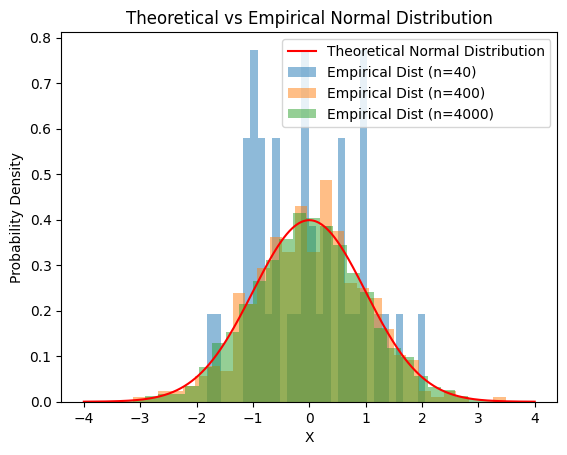

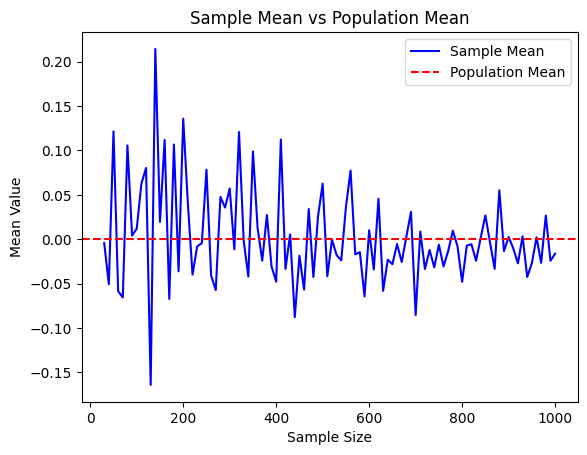

In [17]:
# Generate 10,000 points for the theoretical normal distribution (Gaussian distribution)
# These points will be used to plot the red line
x = np.linspace(-4, 4, 10000)

# Theoretical normal distribution (Gaussian) probability density function (PDF)
# Using mean = 0, std deviation = 1 for standard normal distribution
pdf = norm.pdf(x, 0, 1)

# Plot the theoretical normal distribution (red line)
plt.plot(x, pdf, color='red', label='Theoretical Normal Distribution')

# Define sample sizes to visualize the effect of increasing sample size
sample_sizes = [40, 400, 4000]

# Loop over different sample sizes
for size in sample_sizes:
    # Randomly draw 'size' samples from a normal distribution
    samples = np.random.normal(loc=0, scale=1, size=size)

    # Plot the histogram of the sample data (empirical distribution) in blue
    plt.hist(samples, bins=30, density=True, alpha=0.5, label=f'Empirical Dist (n={size})')

# Add titles and labels
plt.title("Theoretical vs Empirical Normal Distribution")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()

# Show the plot
plt.show()

# ----------- Explanation of sample mean approximation to population mean -----------

# Generating a large population (1 million numbers) with a normal distribution
population_size = 1_000_000
population = np.random.normal(loc=0, scale=1, size=population_size)

# Force the population mean to be exactly zero
population -= np.mean(population)

# Initialize an empty list to store sample means
sample_means = []

# Define a range of sample sizes (30 to 1000)
sample_sizes = np.arange(30, 1001, 10)

# Loop over each sample size and compute the mean of the sample
for size in sample_sizes:
    # Draw a random sample from the population
    sample = np.random.choice(population, size=size, replace=False)

    # Calculate the mean of the sample
    sample_mean = np.mean(sample)

    # Append the sample mean to the list
    sample_means.append(sample_mean)

# Plot the sample means as a function of sample size
plt.plot(sample_sizes, sample_means, label='Sample Mean', color='blue')

# Plot the population mean (which is 0) as a red horizontal line
plt.axhline(0, color='red', linestyle='--', label='Population Mean')

# Add titles and labels
plt.title("Sample Mean vs Population Mean")
plt.xlabel("Sample Size")
plt.ylabel("Mean Value")
plt.legend()

# Show the plot
plt.show()